In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
filename

Saving iris.csv to iris (4).csv


'iris.csv'

In [4]:
df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
scaler = MinMaxScaler()
le = LabelEncoder()
scaled_X = scaler.fit_transform(df.iloc[:, :-1])
label = le.fit_transform(df[4].values)

In [8]:
from tensorflow.keras.utils import to_categorical
onehot_label = to_categorical(label)
onehot_label[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, onehot_label, stratify=label, random_state=seed)
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
                    Dense(16, input_dim=4, activation='relu'),
                    Dense(8, activation='relu'),
                    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)
modelpath = MODEL_DIR + 'best{epoch:03d}-{val_loss:.4f}.hdf5'

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=30)

In [14]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=2000, batch_size=300, verbose=0, callbacks=[checkpointer, early_stopping])


Epoch 00001: val_loss improved from inf to 1.12697, saving model to ./model/best001-1.1270.hdf5

Epoch 00002: val_loss improved from 1.12697 to 1.12451, saving model to ./model/best002-1.1245.hdf5

Epoch 00003: val_loss improved from 1.12451 to 1.12203, saving model to ./model/best003-1.1220.hdf5

Epoch 00004: val_loss improved from 1.12203 to 1.11959, saving model to ./model/best004-1.1196.hdf5

Epoch 00005: val_loss improved from 1.11959 to 1.11721, saving model to ./model/best005-1.1172.hdf5

Epoch 00006: val_loss improved from 1.11721 to 1.11482, saving model to ./model/best006-1.1148.hdf5

Epoch 00007: val_loss improved from 1.11482 to 1.11246, saving model to ./model/best007-1.1125.hdf5

Epoch 00008: val_loss improved from 1.11246 to 1.11030, saving model to ./model/best008-1.1103.hdf5

Epoch 00009: val_loss improved from 1.11030 to 1.10820, saving model to ./model/best009-1.1082.hdf5

Epoch 00010: val_loss improved from 1.10820 to 1.10620, saving model to ./model/best010-1.1062

In [16]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best2000-0.0257.hdf5')
acc = best_model.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')

2/2 [==============================] - 0s 5ms/step - loss: 0.1113 - accuracy: 0.9211
Accuracy: 0.9211


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

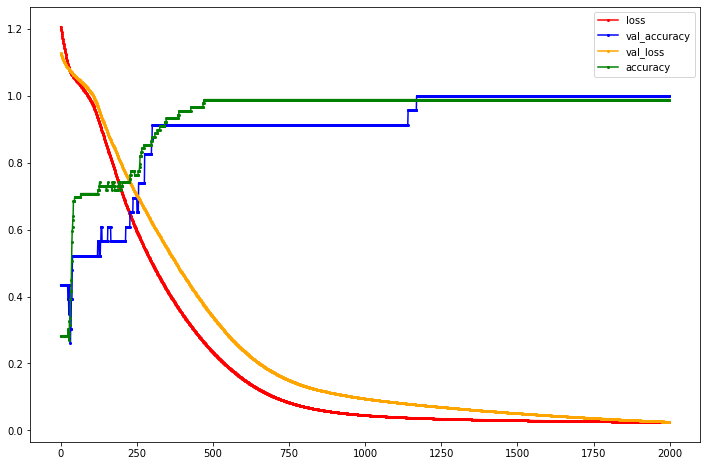

In [18]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']
y_loss = history.history['loss']

x_len = np.arange(len(y_acc))
plt.figure(figsize=(12, 8))
plt.plot(x_len, y_loss, "-o", c='red', markersize=2, label='loss')
plt.plot(x_len, y_vacc, "-o", c='blue', markersize=2, label='val_accuracy')
plt.plot(x_len, y_vloss, "-o", c='orange', markersize=2, label='val_loss')
plt.plot(x_len, y_acc, "-o", c='green', markersize=2, label='accuracy')
plt.legend()
plt.show()